# IBM HR Analytics Employee Attrition & Performance - Case Study

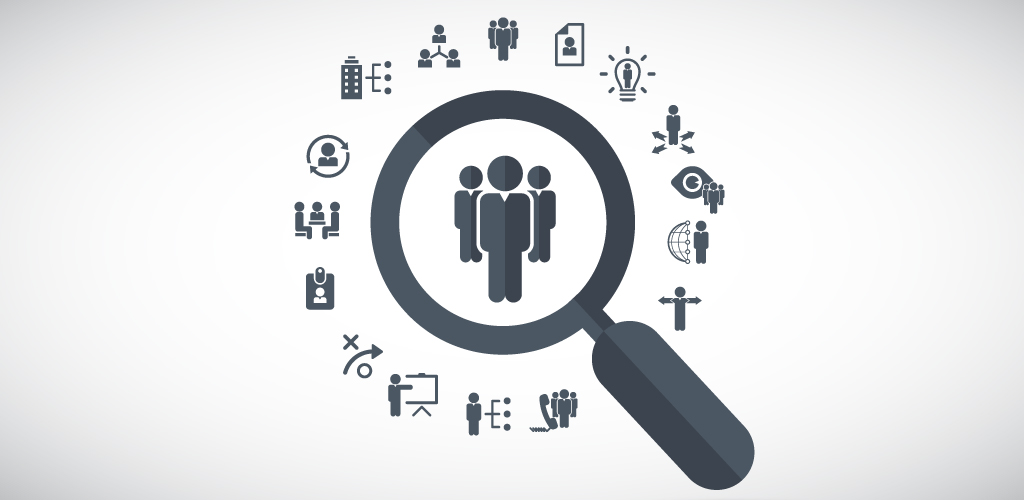

The IBM HR Attrition Case Study is a scenario in which a fictitious dataset is used to identify key factors that may predict whether an employee is likely to leave the company or not. The case study includes a comprehensive analysis of the data, as well as the use of predictive modeling techniques, in order to understand the most significant factors and make accurate predictions about employee attrition. The goal is to identify important factors that may be contributing to employee turnover, and to use this information to develop strategies for retaining valuable employees.

[Dataset Source](https://developer.ibm.com/patterns/data-science-life-cycle-in-action-to-solve-employee-attrition-problem/)

In [292]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

import plotly.offline as pyoff
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
pyoff.init_notebook_mode()

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

import xgboost as xgb
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_classif, f_classif, RFE, chi2

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

import imblearn
from imblearn.over_sampling import SMOTE

import pickle
import joblib

In [293]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# 1. Exploratory Analysis

In [294]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [295]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  JobSatisfaction  MonthlyIncome   MonthlyRate  \
count  1470.000000      1470.000000    1470.000000   1470.000000   
mean      2.063946         2.728571    6502.931293  14313.103401   
std       1.106940         1.102846    4707.956783   7117.786044   
min       1.000000         1.000000    1009.000000   2094.000000   
25%       1.000000         2.000000    2911.000000   8047.000000   
50%       2.000000         3.000000    4919.000000  14235.500000   
75%       3.000000         4.000000    8379.000000  20461.500000   
max       5.000000         4.000000   19999.000000  26999.000000   

       NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
count         1470.000000        1470.000000        1470.000000   
mean             2.693197          15.209524           3.153741   
std              2.498009           3.659938           0.360824   
min              0.000000          11.000000           3.000000   
25%              1.000000          12.000000           3.000000   
50%              2.000000          14.000000           3.000000   
75%              4.000000          18.000000           3.000000   
max              9.000000          25.000000           4.000000   

       RelationshipSatisfaction  StandardHours  StockOptionLevel  \
count               1470.000000         1470.0       1470.000000   
mean                   2.712245           80.0          0.793878   
std                    1.081209            0.0          0.852077   
min                    1.000000           80.0          0.000000   
25%                    2.000000           80.0          0.000000   
50%                    3.000000           80.0          1.000000   
75%                    4.000000           80.0          1.000000   
max                    4.000000           80.0          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count        1470.000000            1470.000000      1470.000000   
mean           11.279592               2.799320         2.761224   
std             7.780782               1.289271         0.706476   
min             0.000000               0.000000         1.000000   
25%             6.000000               2.000000         2.000000   
50%            10.000000               3.000000         3.000000   
75%            15.000000               3.000000         3.000000   
max            40.000000               6.000000         4.000000   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count     1470.000000         1470.000000              1470.

In [296]:
df.EmployeeCount.value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [297]:
df.StandardHours.value_counts()

80    1470
Name: StandardHours, dtype: int64

In [298]:
df.Over18.value_counts()

Y    1470
Name: Over18, dtype: int64

In [299]:
#Dropping columns that appear to have no impact on the analysis
columns = ['DailyRate', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'HourlyRate', 'MonthlyRate',
        'Over18', 'RelationshipSatisfaction', 'StandardHours']
df.drop(columns, inplace=True, axis=1)

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   BusinessTravel           1470 non-null   object
 3   Department               1470 non-null   object
 4   DistanceFromHome         1470 non-null   int64 
 5   Education                1470 non-null   int64 
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   Gender                   1470 non-null   object
 8   JobInvolvement           1470 non-null   int64 
 9   JobLevel                 1470 non-null   int64 
 10  JobRole                  1470 non-null   object
 11  JobSatisfaction          1470 non-null   int64 
 12  MaritalStatus            1470 non-null   object
 13  MonthlyIncome            1470 non-null   int64 
 14  NumCompaniesWorked       1470 non-null  

In [301]:
df.isna().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobLevel                   0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
WorkLifeBalance            0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [302]:
#How the target is divided
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

## 1.1. Age Analysis

In [303]:
df.Age.describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

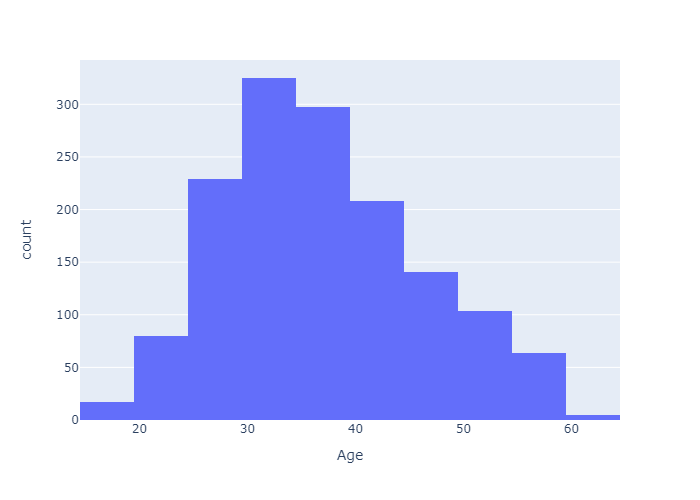

In [304]:
fig = px.histogram(df, x="Age",nbins=(10))
fig.show("png")

In [305]:
print('\033[1m' "Findings:")
print(round(len(df.query("Age>=30 and Age<40"))/len(df)*100,2),"% of employees are in the range of 30 to 39 years.")

Findings:
42.31 % of employees are in the range of 30 to 39 years.


In [306]:
positive_attrition = df.loc[df['Attrition'] == 'Yes']
negative_attrition = df.loc[df['Attrition'] == 'No']

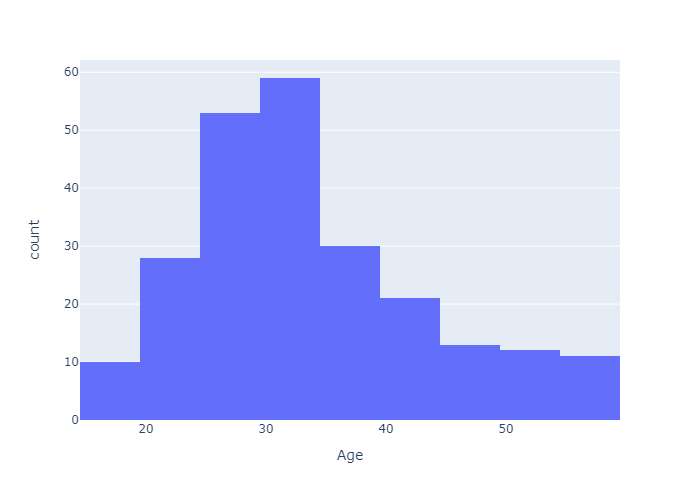

In [307]:
fig = px.histogram(positive_attrition, x="Age",nbins=(10))
fig.show("png")

In [308]:
print('\033[1m' "Findings:")
print(round(len(positive_attrition.query("Age>=25 and Age<35"))/len(positive_attrition)*100,2),"% of the employees likely to leave the company belong to the age group (25 - 34)")

Findings:
47.26 % of the employees likely to leave the company belong to the age group (25 - 34)


## 1.2. Department Analysis

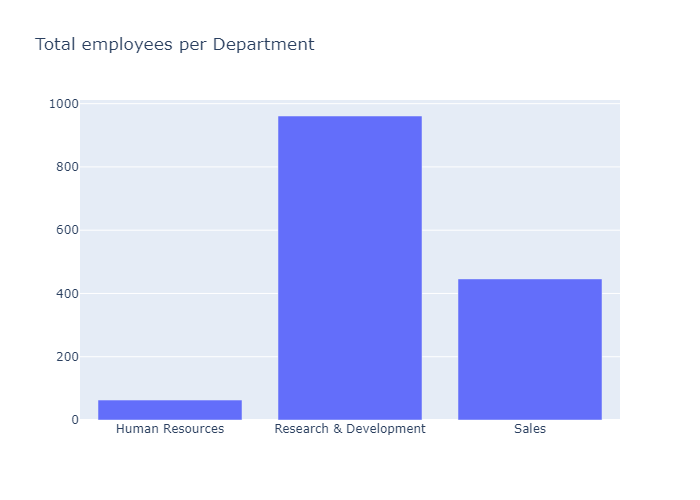

In [309]:
# Plot

plot_data = [go.Bar(x = df['Department'].value_counts().sort_index().index, 
                    y = df['Department'].value_counts().sort_index(),)]

# Layout
plot_layout = go.Layout(xaxis = {"type": "category"}, 
                        title = 'Total employees per Department')

fig = go.Figure(data = plot_data, layout = plot_layout)
fig.show("png")

In [310]:
print('\033[1m' "Findings:")
print("R&D is the largest department, with", round(len(df.query("Department=='Research & Development'"))/len(df)*100,2), "% of the total")

Findings:
R&D is the largest department, with 65.37 % of the total


In [311]:
Department_Att = positive_attrition.groupby(['Department'])["Attrition"].count().to_frame()
Department_Att['Total'] = df.groupby(['Department'])["Attrition"].count()
Department_Att['Yes%'] = Department_Att['Attrition']/Department_Att['Total']*100
Department_Att = Department_Att.reset_index().sort_values(by='Yes%', ascending=False)
Department_Att

Department  Attrition  Total       Yes%
2                   Sales         92    446  20.627803
0         Human Resources         12     63  19.047619
1  Research & Development        133    961  13.839750

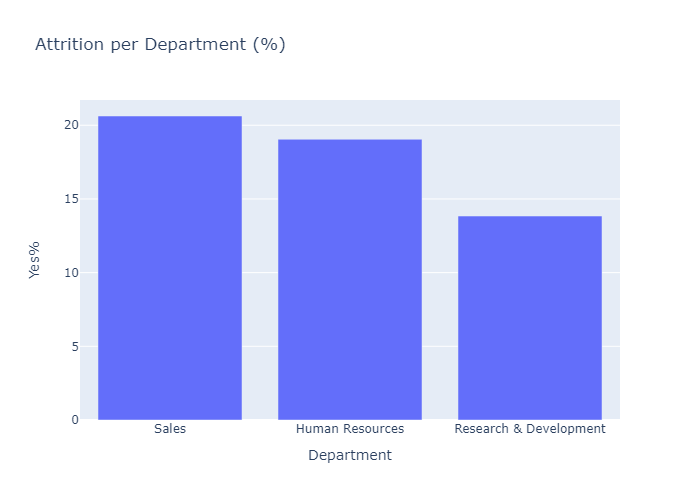

In [312]:
fig = px.bar(data_frame = Department_Att, x="Department", y="Yes%", title="Attrition per Department (%)")

fig.show("png")

In [313]:
print('\033[1m' "Findings:")
print("Sales is the department that has the highest turnover among the departments.")

Findings:
Sales is the department that has the highest turnover among the departments.


## 1.3. Job Role Analysis

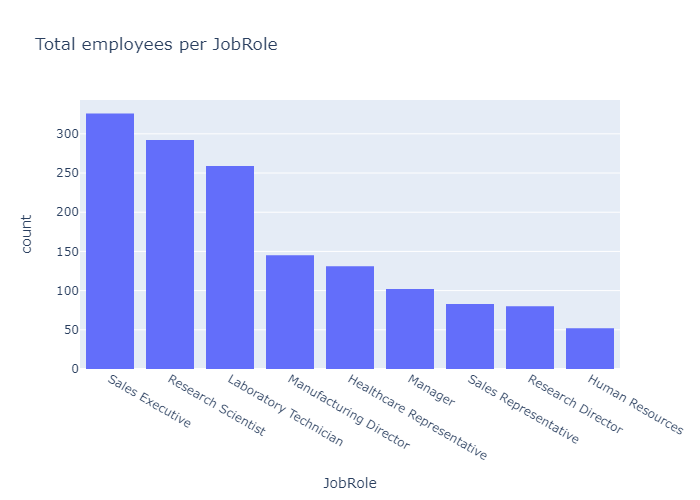

In [314]:
fig = px.histogram(data_frame = df, x='JobRole', title="Total employees per JobRole")

fig.show("png")

In [315]:
JobRole_Att = positive_attrition.groupby(["JobRole"])["Attrition"].count().to_frame()
JobRole_Att['Total'] = df.groupby(["JobRole"])["Attrition"].count()
JobRole_Att['Yes%'] = JobRole_Att['Attrition']/JobRole_Att['Total']*100
JobRole_Att = JobRole_Att.reset_index().sort_values(by='Yes%', ascending=False)
JobRole_Att

JobRole  Attrition  Total       Yes%
8       Sales Representative         33     83  39.759036
2      Laboratory Technician         62    259  23.938224
1            Human Resources         12     52  23.076923
7            Sales Executive         57    326  17.484663
6         Research Scientist         47    292  16.095890
4     Manufacturing Director         10    145   6.896552
0  Healthcare Representative          9    131   6.870229
3                    Manager          5    102   4.901961
5          Research Director          2     80   2.500000

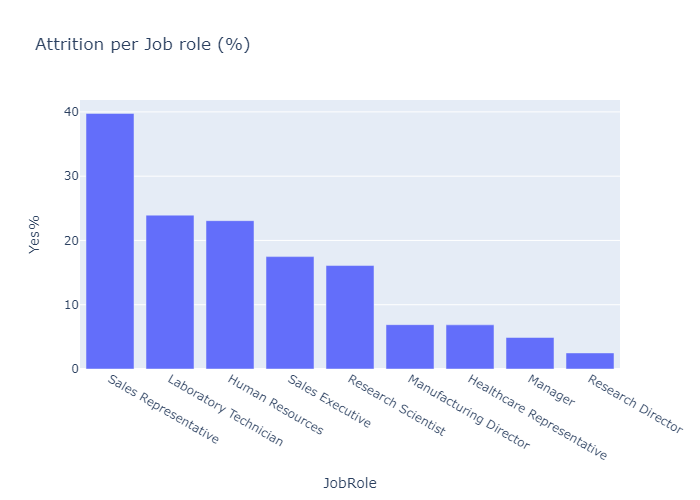

In [316]:
fig = px.bar(data_frame = JobRole_Att, x="JobRole", y="Yes%", title="Attrition per Job role (%)")

fig.show("png")

In [317]:
print('\033[1m' "Findings:")
print("Sales Representative is the role that has the highest internal turnover among the job roles.")

Findings:
Sales Representative is the role that has the highest internal turnover among the job roles.


## 1.4. Gender Analysis

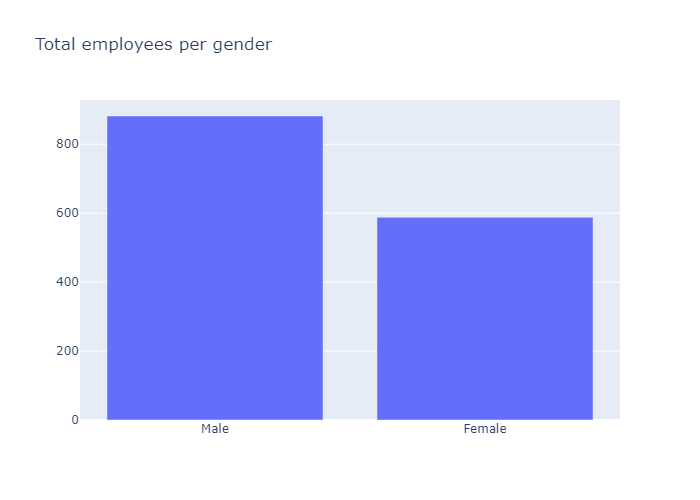

In [318]:
# Plot

plot_data = [go.Bar(x = df['Gender'].value_counts().index, 
                    y = df['Gender'].value_counts(),)]

# Layout
plot_layout = go.Layout(xaxis = {"type": "category"}, 
                        title = 'Total employees per gender')

fig = go.Figure(data = plot_data, layout = plot_layout)
fig.show("png")

In [319]:
Gender_Att = positive_attrition.groupby(["Gender"])["Attrition"].count().to_frame()
Gender_Att['Total'] = df.groupby(["Gender"])["Attrition"].count()
Gender_Att['Yes%'] = Gender_Att['Attrition']/Gender_Att['Total']*100
Gender_Att = Gender_Att.reset_index().sort_values(by='Yes%', ascending=False)
Gender_Att

Gender  Attrition  Total       Yes%
1    Male        150    882  17.006803
0  Female         87    588  14.795918

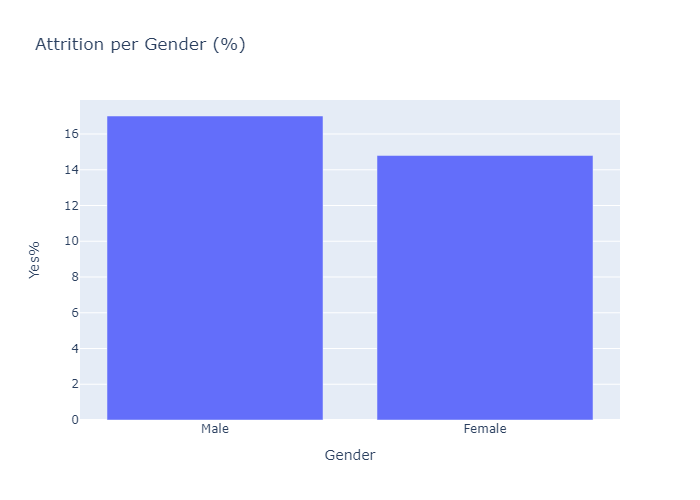

In [320]:
fig = px.bar(data_frame = Gender_Att, x="Gender", y="Yes%", title="Attrition per Gender (%)")

fig.show("png")

In [321]:
print('\033[1m' "Findings:")
print("From the above plot, we can infer that male employees are likely to leave organization as they amount to 17% compared to female who have 15% attrition rate.")

Findings:
From the above plot, we can infer that male employees are likely to leave organization as they amount to 17% compared to female who have 15% attrition rate.


## 1.5. More Inferences

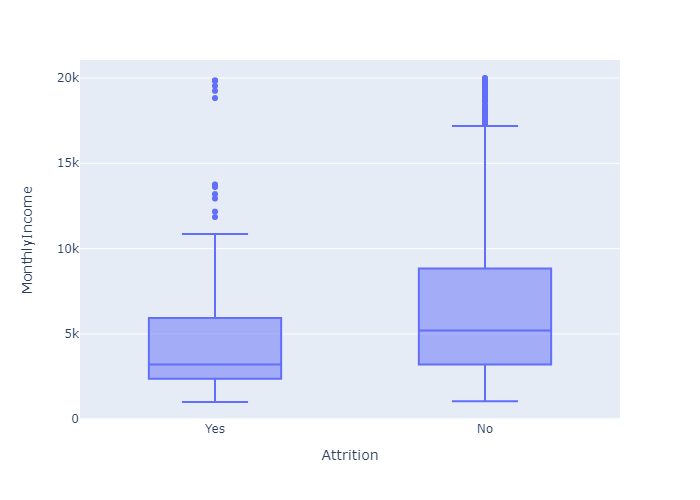

In [322]:
fig = px.box(df, x="Attrition", y="MonthlyIncome", )
fig.show("png")

In [323]:
print('\033[1m' "Findings:")
print("Workers who are paid less are more likely to leave the company.")

Findings:
Workers who are paid less are more likely to leave the company.


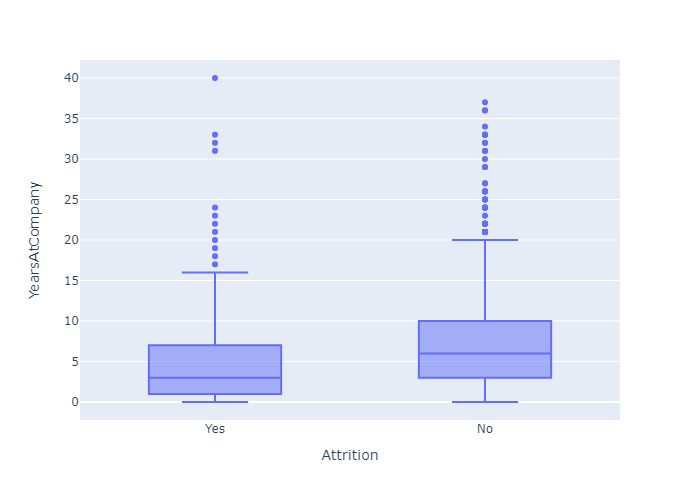

In [324]:
fig = px.box(df, x="Attrition", y="YearsAtCompany", )
fig.show("png")

In [325]:
print('\033[1m' "Findings:")
print("Employees who have been with the company longer are less likely to leave")

Findings:
Employees who have been with the company longer are less likely to leave


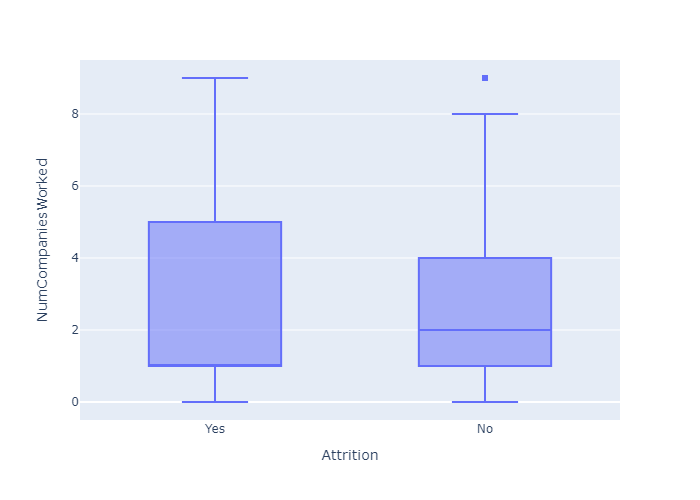

In [326]:
fig = px.box(df, x="Attrition", y="NumCompaniesWorked", )
fig.show("png")

In [327]:
print('\033[1m' "Findings:")
print("Employees who have worked at many companies tend to stay at their current company for less time.")

Findings:
Employees who have worked at many companies tend to stay at their current company for less time.


### Data Encoding

In [328]:
df.head()

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   41       Yes      Travel_Rarely                   Sales                 1   
1   49        No  Travel_Frequently  Research & Development                 8   
2   37       Yes      Travel_Rarely  Research & Development                 2   
3   33        No  Travel_Frequently  Research & Development                 3   
4   27        No      Travel_Rarely  Research & Development                 2   

   Education  EnvironmentSatisfaction  Gender  JobInvolvement  JobLevel  \
0          2                        2  Female               3         2   
1          1                        3    Male               2         2   
2          2                        4    Male               2         1   
3          4                        4  Female               3         1   
4          1                        1    Male               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   NumCompaniesWorked OverTime  PercentSalaryHike  PerformanceRating  \
0                   8      Yes                 11                  3   
1                   1       No                 23                  4   
2                   6      Yes                 15                  3   
3                   1      Yes                 11                  3   
4                   9       No                 12                  3   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [329]:
categoric_var = df.select_dtypes(include=['object']).columns
categoric_var

Index(['Attrition', 'BusinessTravel', 'Department', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [330]:
#Deep copy the original data
df_e = df.copy(deep=True)

le = LabelEncoder()
for col in categoric_var:
        df_e[col] = le.fit_transform(df[col])
        le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        print('Feature', col)
        print('mapping', le_name_mapping)

Feature Attrition
mapping {'No': 0, 'Yes': 1}
Feature BusinessTravel
mapping {'Non-Travel': 0, 'Travel_Frequently': 1, 'Travel_Rarely': 2}
Feature Department
mapping {'Human Resources': 0, 'Research & Development': 1, 'Sales': 2}
Feature Gender
mapping {'Female': 0, 'Male': 1}
Feature JobRole
mapping {'Healthcare Representative': 0, 'Human Resources': 1, 'Laboratory Technician': 2, 'Manager': 3, 'Manufacturing Director': 4, 'Research Director': 5, 'Research Scientist': 6, 'Sales Executive': 7, 'Sales Representative': 8}
Feature MaritalStatus
mapping {'Divorced': 0, 'Married': 1, 'Single': 2}
Feature OverTime
mapping {'No': 0, 'Yes': 1}


In [331]:
df_e.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      1470 non-null   int64
 1   Attrition                1470 non-null   int32
 2   BusinessTravel           1470 non-null   int32
 3   Department               1470 non-null   int32
 4   DistanceFromHome         1470 non-null   int64
 5   Education                1470 non-null   int64
 6   EnvironmentSatisfaction  1470 non-null   int64
 7   Gender                   1470 non-null   int32
 8   JobInvolvement           1470 non-null   int64
 9   JobLevel                 1470 non-null   int64
 10  JobRole                  1470 non-null   int32
 11  JobSatisfaction          1470 non-null   int64
 12  MaritalStatus            1470 non-null   int32
 13  MonthlyIncome            1470 non-null   int64
 14  NumCompaniesWorked       1470 non-null   int64
 15  Over

No more Object as feature

In [332]:
df_e.head()

Age  Attrition  BusinessTravel  Department  DistanceFromHome  Education  \
0   41          1               2           2                 1          2   
1   49          0               1           1                 8          1   
2   37          1               2           1                 2          2   
3   33          0               1           1                 3          4   
4   27          0               2           1                 2          1   

   EnvironmentSatisfaction  Gender  JobInvolvement  JobLevel  JobRole  \
0                        2       0               3         2        7   
1                        3       1               2         2        6   
2                        4       1               2         1        2   
3                        4       0               3         1        6   
4                        1       1               3         1        2   

   JobSatisfaction  MaritalStatus  MonthlyIncome  NumCompaniesWorked  \
0                4              2           5993                   8   
1                2              1           5130                   1   
2                3              2           2090                   6   
3                3              1           2909                   1   
4                2              1           3468                   9   

   OverTime  PercentSalaryHike  PerformanceRating  StockOptionLevel  \
0         1                 11                  3                 0   
1         0                 23                  4                 1   
2         1                 15                  3                 0   
3         1                 11                  3                 0   
4         0                 12                  3                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2

In [333]:
df_e.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [334]:
corr_matrix = df_e.corr()

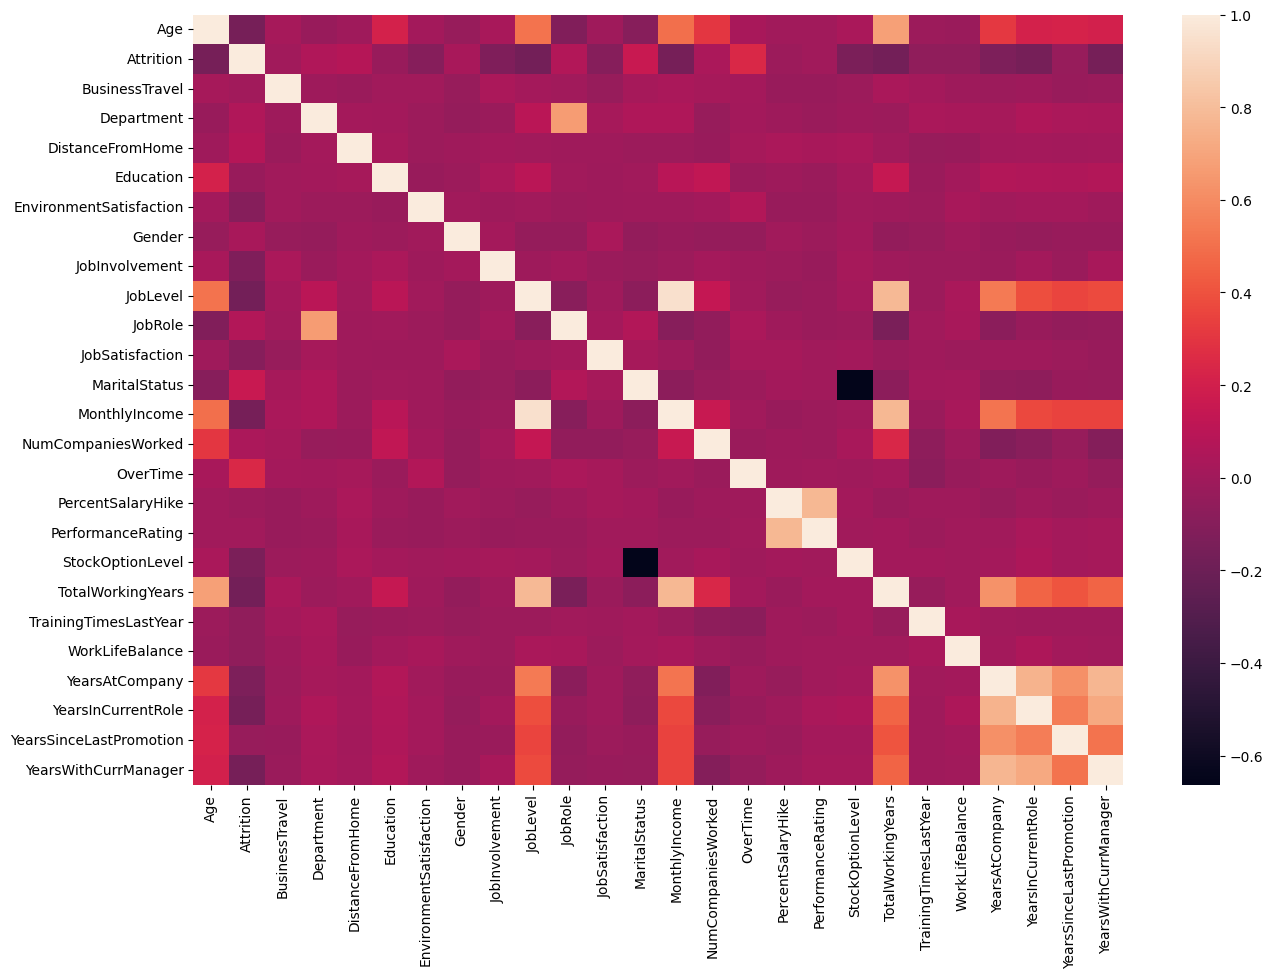

In [335]:
plt.rcParams["figure.figsize"] = [15,10]
sns.heatmap(corr_matrix)
plt.show()

**In order to better understand the correlations, let's list the largest values**

In [336]:
#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))

#first element of sol series is the pair with the biggest correlation
sol

JobLevel           MonthlyIncome           0.950300
                   TotalWorkingYears       0.782208
PercentSalaryHike  PerformanceRating       0.773550
MonthlyIncome      TotalWorkingYears       0.772893
YearsAtCompany     YearsWithCurrManager    0.769212
                                             ...   
Attrition          MonthlyIncome          -0.159840
                   YearsInCurrentRole     -0.160545
                   JobLevel               -0.169105
                   TotalWorkingYears      -0.171063
MaritalStatus      StockOptionLevel       -0.662577
Length: 325, dtype: float64

Checking the variables that are highly correlated

In [337]:
print(sol.min())
print(sol.max())

-0.6625772916604346
0.9502999134798473


In [338]:
df_corr = pd.DataFrame(sol).reset_index()

In [339]:
df_corr.rename(columns = {'level_0':'Var1', 'level_1':'Var2',
                              0:'Corr'}, inplace = True)

In [340]:
df_high_corr = df_corr.query("Corr>=0.6 or Corr<=-0.6")
df_high_corr

Var1                     Var2      Corr
0              JobLevel            MonthlyIncome  0.950300
1              JobLevel        TotalWorkingYears  0.782208
2     PercentSalaryHike        PerformanceRating  0.773550
3         MonthlyIncome        TotalWorkingYears  0.772893
4        YearsAtCompany     YearsWithCurrManager  0.769212
5        YearsAtCompany       YearsInCurrentRole  0.758754
6    YearsInCurrentRole     YearsWithCurrManager  0.714365
7                   Age        TotalWorkingYears  0.680381
8            Department                  JobRole  0.662431
9     TotalWorkingYears           YearsAtCompany  0.628133
10       YearsAtCompany  YearsSinceLastPromotion  0.618409
324       MaritalStatus         StockOptionLevel -0.662577

**Analysis of correlation values:**
- Job level is highly correlated with Monthly income.
- Job level is highly correlated with total working years.
- Monthly income is highly correlated with total working years.
- Age is positively correlated with the Total working years.
- On the other hand, Marital status and stock option level are negatively correlated.

# 2. Split the dataset

In [341]:
#Target
y = df_e.Attrition

Since the variable JobLevel has 0.95 correlation coefficient with MonthlyIncome and 0.78 with TotalWorkingYears, we decided to remove both features

In [342]:
#Features
X = df_e.drop(['Attrition','JobLevel', 'TotalWorkingYears'], axis = 1)

In [343]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y, 
                                                        test_size = 0.20, 
                                                        random_state = 1234,
                                                        stratify = df_e.Attrition)

In [344]:
len(X_train)

1176

In [345]:
len(X_test)

294

# 3. Class Balance

In [346]:
y_train.value_counts()

0    986
1    190
Name: Attrition, dtype: int64

In [347]:
# Let's apply the oversampling technique and increase the number of examples of the minority class
over_sampler = SMOTE(k_neighbors = 2)

In [348]:
X_res, y_res = over_sampler.fit_resample(X_train, y_train)

In [349]:
len(X_res)

1972

In [350]:
len(y_res)

1972

In [351]:
y_res.value_counts()

0    986
1    986
Name: Attrition, dtype: int64

Setting the dataset label

In [352]:
X_train = X_res

y_train = y_res

# 4. Standardize the Data

In [353]:
scaler = MinMaxScaler()

In [354]:
scaler.fit(X_train)

MinMaxScaler()

In [355]:
X_train = scaler.transform(X_train)

In [356]:
X_test = scaler.transform(X_test)

# 5. Features Selection

We will evaluate various Feature Selection techniques to identify the optimal combination of predictor variables to use. Our intention is to find the 5 most important variables

## 5.1. SelectKBest

In [357]:
tFeatures = X_train

#Creating a SelectKBest object to select the 5 most impactful predictor variables.

skb = SelectKBest(chi2, k = 5)

# Capturing the best predictor variables.

bestFeatuesSKB = skb.fit_transform(X_train, y_train)

# Capturing the name of the best predictor variables.

bfSkb = X.columns[skb.get_support()]

# Displaying the name of the best predictor variables.

bfSkb

Index(['EnvironmentSatisfaction', 'JobSatisfaction', 'PerformanceRating',
       'StockOptionLevel', 'YearsWithCurrManager'],
      dtype='object')

In [358]:
# Creating a DataFrame with the scores obtained for each of the Features according to the technique used.

sc = pd.DataFrame(skb.scores_, index = X.columns, columns = ['score'])

# Capturing the scores of the best predictor variables.

sc = sc[skb.get_support()]

# Sorting the Dataframe with the scores.

sc = sc.sort_values(by = 'score', ascending = False)

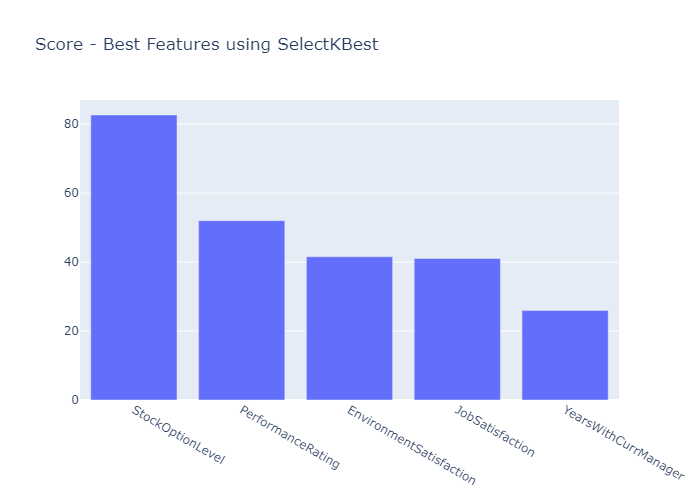

In [359]:
# Plot

plot_data = [go.Bar(x = sc.index, 
                    y = sc.score.values,)]

# Layout
plot_layout = go.Layout(xaxis = {"type": "category"}, 
                        title = 'Score - Best Features using SelectKBest ')

fig = go.Figure(data = plot_data, layout = plot_layout)
fig.show("png")

## 5.2. Information Gain

In [360]:
tFeatures = X_train

# Creating an object of class mutual_info_classif.

bestFeatuesIG = mutual_info_classif(tFeatures, y_train, discrete_features = 'auto', n_neighbors = 3)

# Putting the Scores obtained on a DataFrame.

scoreFeatures = pd.DataFrame(bestFeatuesIG, index = X.columns,  columns = ['score'])

# Capturing the name of the best predictor variables.

bfIg = scoreFeatures.sort_values(by='score', ascending=False).head(5)

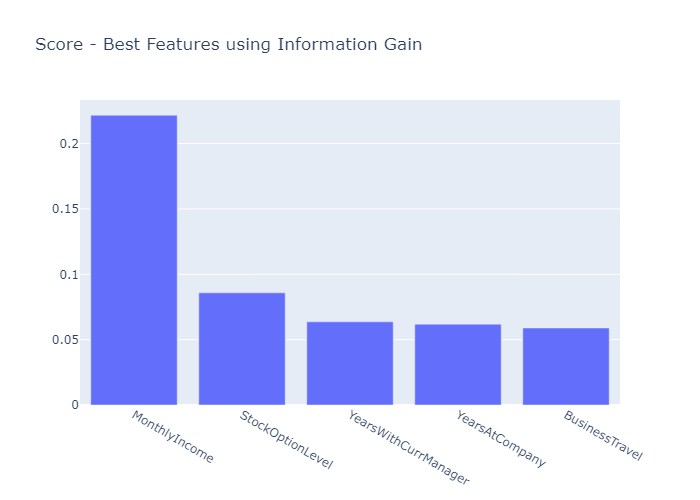

In [361]:
# Plot

plot_data = [go.Bar(x = bfIg.index, 
                    y = bfIg.score.values,)]

# Layout
plot_layout = go.Layout(xaxis = {"type": "category"}, 
                        title = 'Score - Best Features using Information Gain ')

fig = go.Figure(data = plot_data, layout = plot_layout)
fig.show("png")

In [362]:
# Capturing the name of the best predictor variables.

bfIg = bfIg.index

bfIg

Index(['MonthlyIncome', 'StockOptionLevel', 'YearsWithCurrManager',
       'YearsAtCompany', 'BusinessTravel'],
      dtype='object')

## 5.3. ANOVA F-value

To determine the relationship between each feature and the target variable, we will compute a chi-square statistic for categorical features and an F-value ANOVA for quantitative features. The F-value scores will assess whether the means of the numeric feature differ significantly when grouped by the target variable.

In [363]:
tFeatures = X_train

skb = SelectKBest(f_classif, k = 5)

# Capturing the best predictor variables.

bestFeatuesANOVA = skb.fit_transform(tFeatures, y_train)

# Capturing the name of the best predictor variables.

bfAnova = X.columns[skb.get_support()]

bfAnova

Index(['EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction',
       'StockOptionLevel', 'YearsWithCurrManager'],
      dtype='object')

In [364]:
# Creating a DataFrame with the scores obtained for each of the Features according to the technique used.

sc = pd.DataFrame(skb.scores_, index = X.columns, columns = ['score'])

# Capturing the scores of the best predictor variables.

sc = sc[skb.get_support()]

# Sorting the Dataframe with the scores.

sc = sc.sort_values(by = 'score', ascending = False)

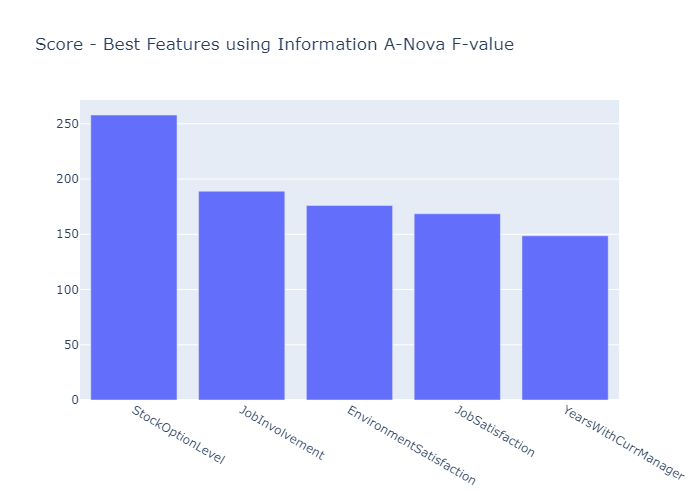

In [365]:
# Plot

plot_data = [go.Bar(x = sc.index, 
                    y = sc.score.values,)]

# Layout
plot_layout = go.Layout(xaxis = {"type": "category"}, 
                        title = 'Score - Best Features using Information A-Nova F-value ')

fig = go.Figure(data = plot_data, layout = plot_layout)
fig.show("png")

## 5.4. Extra Trees Classifier

The extra trees algorithm, like random forests, generates multiple decision trees using random sampling without replacement to create unique datasets for each tree. It also selects a random number of features from the total set of features for each tree. However, the extra trees algorithm sets itself apart by randomly selecting a splitting value for each feature rather than calculating an optimal value using Gini or entropy to divide the data. This random selection of split values results in more diverse and uncorrelated trees.

In [366]:
tFeatures = X_train

# Creating an object.

modelETC = ExtraTreesClassifier()

# Computing the score of each feature.

modelETC.fit (
    X = tFeatures, 
    y = y_train
)

# Inserting obtained Scores into a DataFrame.

featuresImpETC = pd.DataFrame(data = modelETC.feature_importances_, index = X.columns, columns = ['score'])

# Capturing the 5 variables with the highest scores.

bfEtc = featuresImpETC.sort_values(by = 'score', ascending = False).head(5)

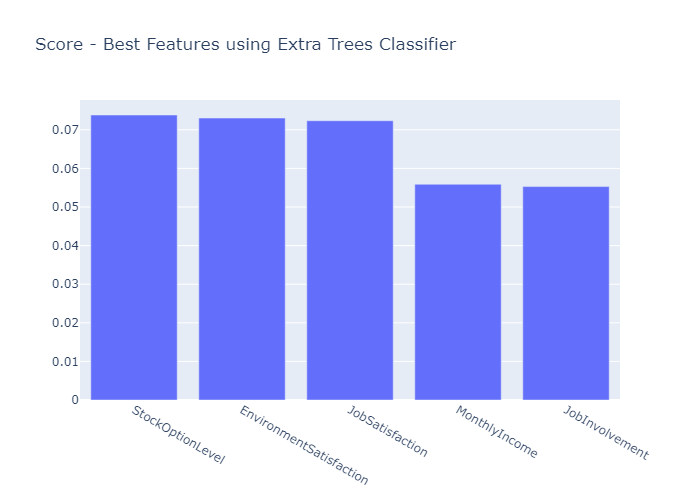

In [367]:
# Plot

plot_data = [go.Bar(x = bfEtc.index, 
                    y = bfEtc.score.values,)]

# Layout
plot_layout = go.Layout(xaxis = {"type": "category"}, 
                        title = 'Score - Best Features using Extra Trees Classifier')

fig = go.Figure(data = plot_data, layout = plot_layout)
fig.show("png")

In [368]:
# Capturing the name of the 5 variables with the highest scores.

bfEtc = bfEtc.index

bfEtc

Index(['StockOptionLevel', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MonthlyIncome', 'JobInvolvement'],
      dtype='object')

## 5.5. Random Forest Importance

In [369]:
tFeatures = X_train

# Creating an object of class RandomForestClassifier.

rfImp = RandomForestClassifier (
    n_estimators = 200,
    random_state = 0
)

# Training the model

rfImp.fit(
    X = tFeatures, 
    y = y_train
)

# Predicting the feature scores from the training data.

pred = rfImp.predict(tFeatures)

# Converting the scores to a DataFrame

featuresImpRf = pd.Series(data = rfImp.feature_importances_, index = X.columns)

# Capturing the 5 variables with the highest scores.

bfRf = featuresImpRf.nlargest(5)

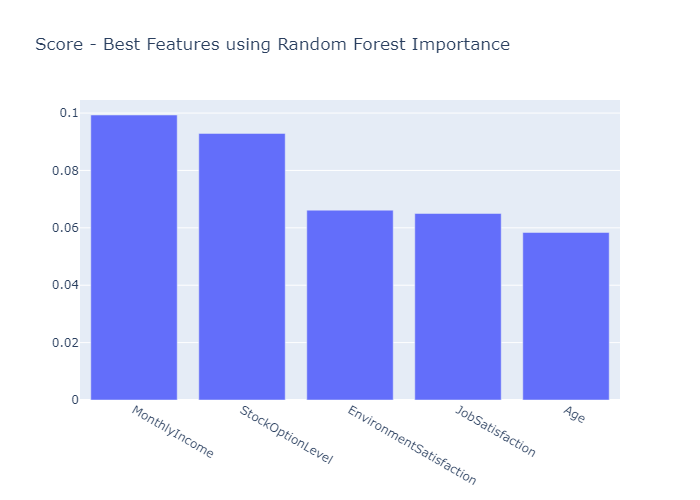

In [370]:
# Plot

plot_data = [go.Bar(x = bfRf.index, 
                    y = bfRf.values,)]

# Layout
plot_layout = go.Layout(xaxis = {"type": "category"}, 
                        title = 'Score - Best Features using Random Forest Importance')

fig = go.Figure(data = plot_data, layout = plot_layout)
fig.show("png")

In [371]:
bfRf = bfRf.index

bfRf

Index(['MonthlyIncome', 'StockOptionLevel', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'Age'],
      dtype='object')

## 5.6. RFE

Recursive feature elimination (RFE) is a method of selecting features by fitting a model and removing the weakest features until a predetermined number is reached. Features are ranked according to the model's coef_ or feature_importances_ attributes, and RFE iteratively removes a small number of features in each loop to reduce dependencies and collinearity in the model.

In [372]:
tFeatures = X_train

# Instantiating an object of class RFE to select the 5 best predictor variables, using the XGBClassifer algorithm.

rfe = RFE (
    estimator            = xgb.XGBClassifier(), 
    n_features_to_select = 5
)

# Capturing the best predictor variables.

rfeFit = rfe.fit (
    X = tFeatures, 
    y = y_train
)

In [373]:
# Capturing the name of the best predictor variables.

bfRfe = X.columns[rfeFit.support_]

bfRfe

Index(['BusinessTravel', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'PerformanceRating', 'StockOptionLevel'],
      dtype='object')

## 5.7. Evaluating the Results

In [374]:
# Creating a list, with all the results generated by the Feature Selection techniques used.

bestFeaturesNames = [bfSkb.values, bfIg.values, bfAnova.values, bfEtc.values, bfRf.values, bfRfe.values]

# Converting the list, to a DataFrame, with the features arranged in alphabetical order.

bestFeaturesNamesOrdered = pd.DataFrame (
    data    = [sorted(r) for r in bestFeaturesNames], 
    index   = ['skb', 'ig', 'anova', 'etc', 'rf', 'rfe'],  
    columns = ['Feature' + str(i) for i in range(1, bestFeaturesNames[1].shape[0] +  1)]
)

# Converting the list to a DataFrame.

bestFeaturesNames = pd.DataFrame (
    data    = bestFeaturesNames, 
    index   = ['skb', 'ig', 'anova', 'etc', 'rf', 'rfe'],  
    columns = ['Importance_' + str(i) for i in range(1, bestFeaturesNames[1].shape[0] +  1)]
)

bestFeaturesNames

Importance_1             Importance_2  \
skb    EnvironmentSatisfaction          JobSatisfaction   
ig               MonthlyIncome         StockOptionLevel   
anova  EnvironmentSatisfaction           JobInvolvement   
etc           StockOptionLevel  EnvironmentSatisfaction   
rf               MonthlyIncome         StockOptionLevel   
rfe             BusinessTravel  EnvironmentSatisfaction   

                  Importance_3       Importance_4          Importance_5  
skb          PerformanceRating   StockOptionLevel  YearsWithCurrManager  
ig        YearsWithCurrManager     YearsAtCompany        BusinessTravel  
anova          JobSatisfaction   StockOptionLevel  YearsWithCurrManager  
etc            JobSatisfaction      MonthlyIncome        JobInvolvement  
rf     EnvironmentSatisfaction    JobSatisfaction                   Age  
rfe            JobSatisfaction  PerformanceRating      StockOptionLevel

In [375]:
# Counting the number of occurrences of each of the features within the DataFrame.

bestFeaturesNames.melt().value.value_counts()

StockOptionLevel           6
JobSatisfaction            5
EnvironmentSatisfaction    5
MonthlyIncome              3
YearsWithCurrManager       3
BusinessTravel             2
PerformanceRating          2
JobInvolvement             2
Age                        1
YearsAtCompany             1
Name: value, dtype: int64

In [376]:
# Saving the DataFrame, with the best variables selected, by the Feature Selection techniques used.
bestFeaturesNames.to_csv('bestFeaturesNames.csv')

**Conclusion**
The HR Department can focus on the important variables that contribute significantly in determining if an employee is going to leave an organization. Such variables are:

- StockOptionLevel
- JobSatisfaction
- EnvironmentSatisfaction
- MonthlyIncome
- YearsWithCurrManager                 

# 6. Predictive Analysis

In [377]:
features = bestFeaturesNames.melt().value.value_counts().head(5).index
features

Index(['StockOptionLevel', 'JobSatisfaction', 'EnvironmentSatisfaction',
       'MonthlyIncome', 'YearsWithCurrManager'],
      dtype='object')

In [378]:
X[features]

StockOptionLevel  JobSatisfaction  EnvironmentSatisfaction  \
0                    0                4                        2   
1                    1                2                        3   
2                    0                3                        4   
3                    0                3                        4   
4                    1                2                        1   
...                ...              ...                      ...   
1465                 1                4                        3   
1466                 1                1                        4   
1467                 1                2                        2   
1468                 0                2                        4   
1469                 0                3                        2   

      MonthlyIncome  YearsWithCurrManager  
0              5993                     5  
1              5130                     7  
2              2090                     0  
3              2909                     0  
4              3468                     2  
...             ...                   ...  
1465           2571                     3  
1466           9991                     7  
1467           6142                     3  
1468           5390                     8  
1469           4404                     2  

[1470 rows x 5 columns]

In [379]:
X_train, X_test, y_train, y_test = train_test_split(X[features], 
                                                        y, 
                                                        test_size = 0.20, 
                                                        random_state = 1234)

In [380]:
scaler = StandardScaler()

In [381]:
scaler.fit(X_train)

StandardScaler()

In [382]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [383]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [384]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7789115646258503


**Optimizing Decision Tree Performance**

In [385]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8333333333333334


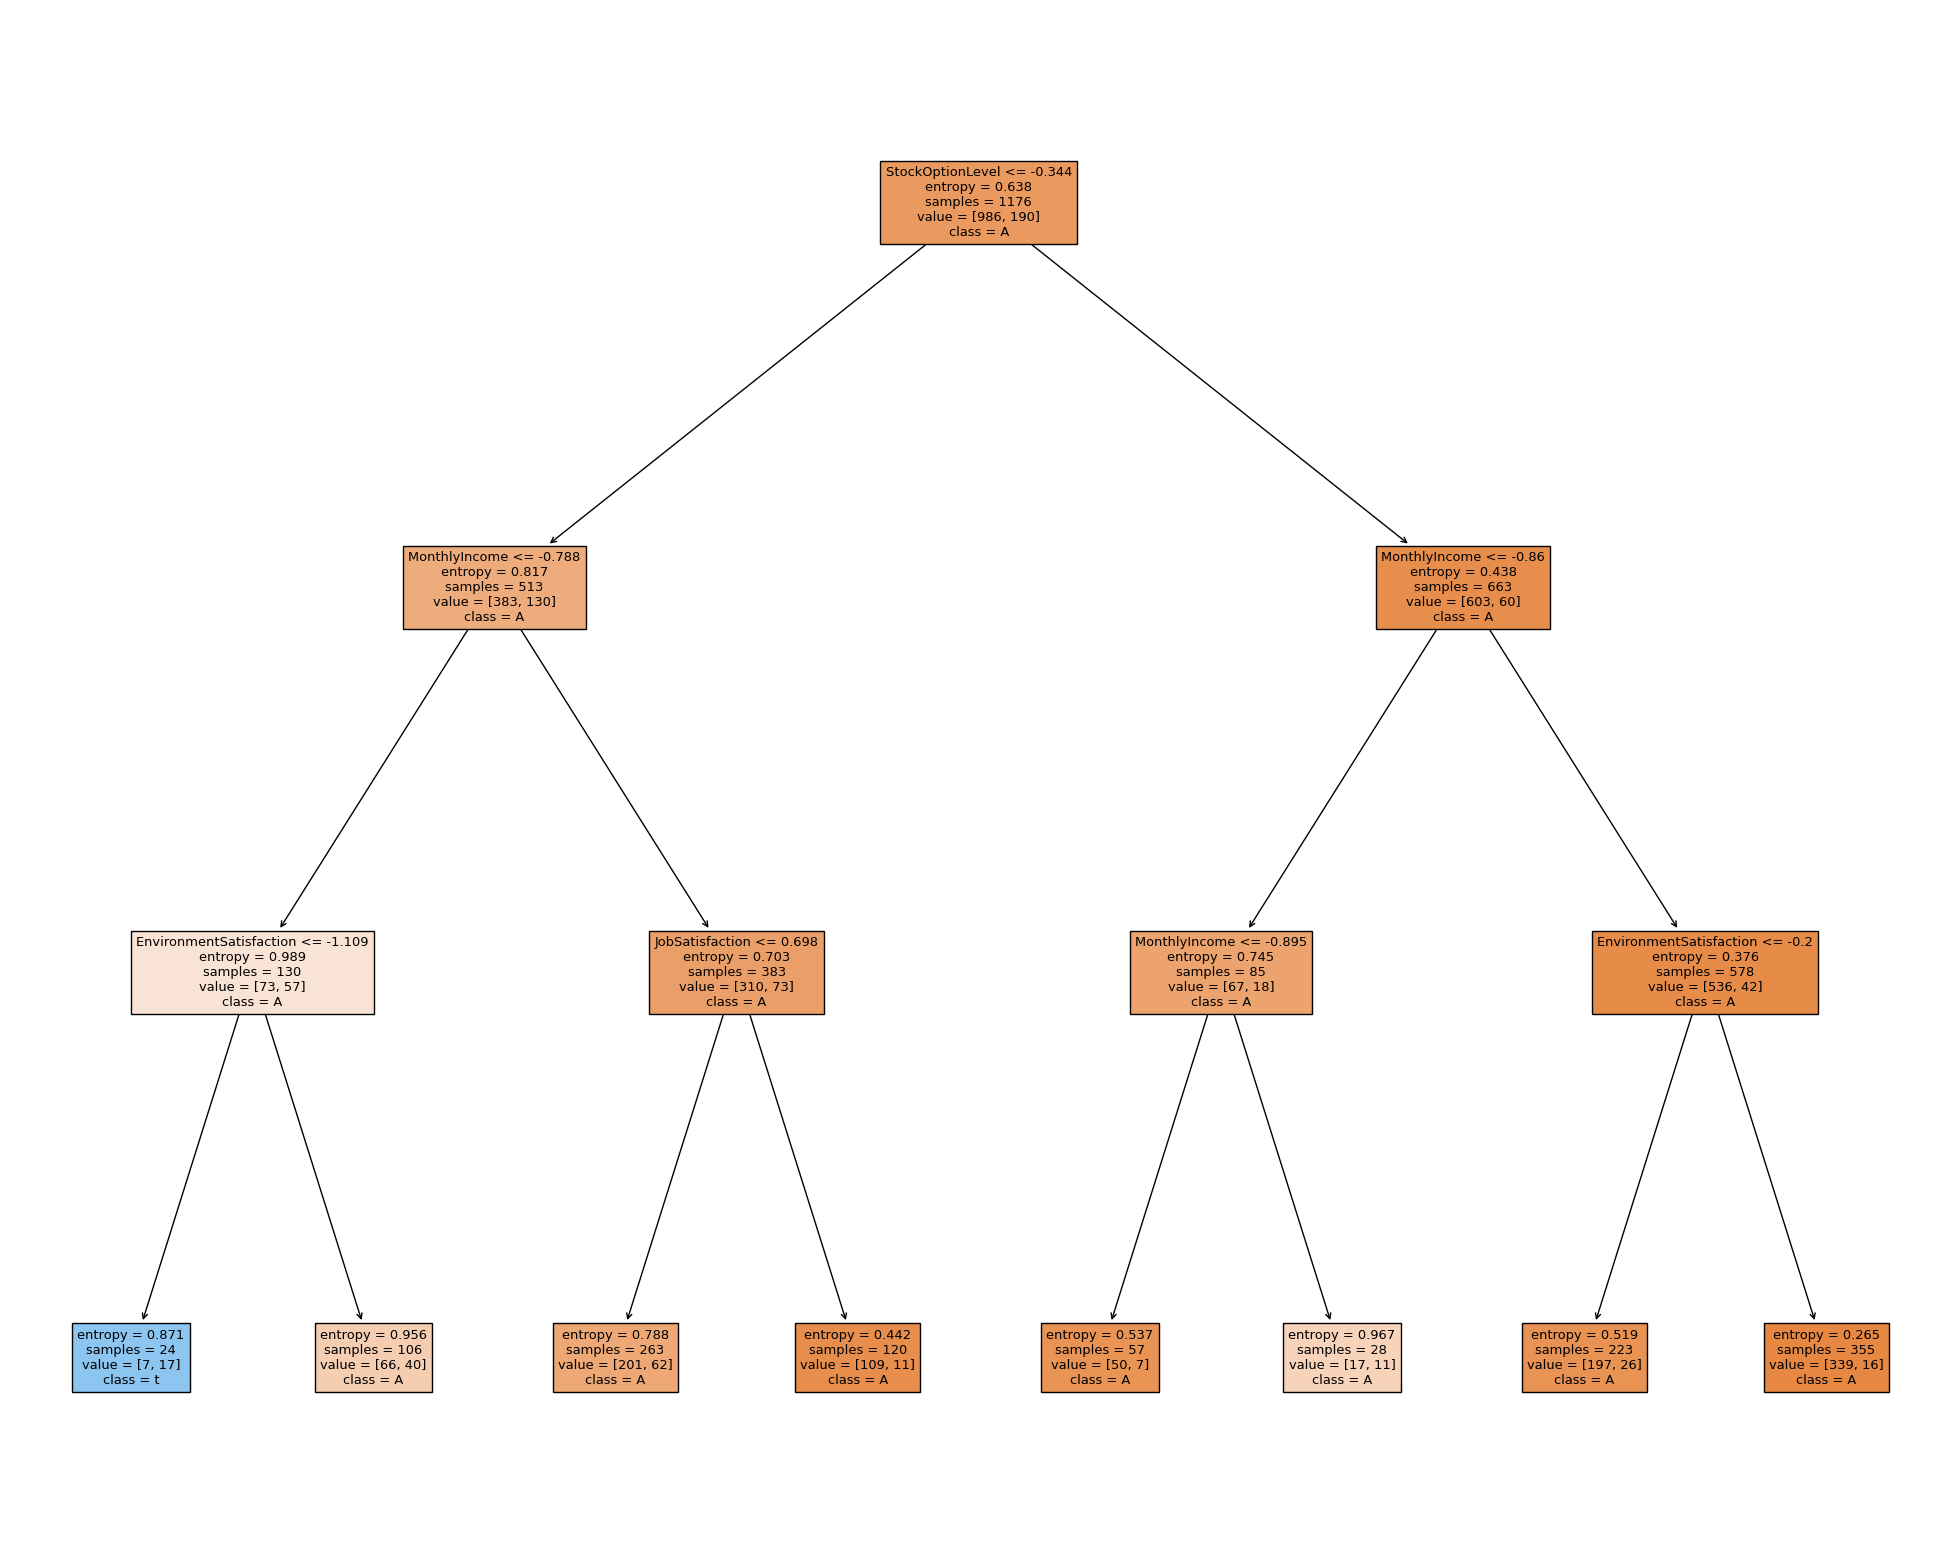

In [386]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=features,  
                   class_names="Attrition",
                   filled=True)

In [387]:
fig.savefig("decistion_tree.png")

In [389]:
# Saving the model
with open('model_rh.pkl', 'wb') as pickle_file:
      joblib.dump(clf, 'model_rh.pkl') 

# 7.Testing the model

In [390]:
features

Index(['StockOptionLevel', 'JobSatisfaction', 'EnvironmentSatisfaction',
       'MonthlyIncome', 'YearsWithCurrManager'],
      dtype='object')

In [391]:
new_employee =[0, 3, 3, 3000, 4]
new_employee

[0, 3, 3, 3000, 4]

In [392]:
new_employee = np.array(new_employee)
new_employee

array([   0,    3,    3, 3000,    4])

In [393]:
new_employee = new_employee.reshape(1, -1)
new_employee

array([[   0,    3,    3, 3000,    4]])

In [395]:
new_employee = scaler.transform(new_employee)
new_employee

C:\Users\arthu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[-1.97023995, -2.23280236, -2.24173671, -1.39484829, -1.17615952]])

In [396]:
# Previsões de classe
pred_new_employee = clf.predict(new_employee)

In [397]:
# Verifica o valor e imprime o resultado final
if pred_new_employee == 1:
    print('this employee is likely to leave')
else:
    print('this employee is not likely to leave')

this employee is likely to leave
